This notebook is aimed at looking at some of the features that were engineered to run through the model, namely the columns containin the number of nearby observations and fires across time and space. Specifically, columns were created that hold the counts of observations and fires (denoted by the column `fire_bool == True`) that are within 0.1 km of a given observation, and within 1-7 days, as well as within 365, 730, 1095 days. These columns all have the base name `all_nearby_count` and `all_nearby_fires`, and then add on the number of days back in time that were used to look for nearby observations. For example, `all_nearby_count1` holds the number of observations that were within 0.1 km of a given observation, up to 1 day prior, whereas `all_nearby_fires2` holds the number of positively labeled observations (e.g. `fire_bool == True`) that were within 0.1 im of a given observation, up to 2 days prior. 

This notebook will be used to examine the distributions of these engineered columns. 

In [1]:
from dsfuncs.processing import remove_outliers
from dsfuncs.dist_plotting import plot_var_dist
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# I'll only be looking at certain columns, so let's only read in the ones that we'll actually be looking at. 
keep_cols = ['fire_bool']
for days_back in (0, 1, 2, 3, 4, 5, 6, 7, 365, 730, 1095): 
    keep_cols.append('all_nearby_count' + str(days_back))
    keep_cols.append('all_nearby_fires' + str(days_back))

In [3]:
engineered_df = pd.read_csv('../../modeling/model_input/geo_time_done.csv', usecols=keep_cols)
engineered_df.columns

Index([u'fire_bool', u'all_nearby_count0', u'all_nearby_fires0',
       u'all_nearby_count1', u'all_nearby_fires1', u'all_nearby_count2',
       u'all_nearby_fires2', u'all_nearby_count3', u'all_nearby_fires3',
       u'all_nearby_count4', u'all_nearby_fires4', u'all_nearby_count5',
       u'all_nearby_fires5', u'all_nearby_count6', u'all_nearby_fires6',
       u'all_nearby_count7', u'all_nearby_fires7', u'all_nearby_count365',
       u'all_nearby_fires365', u'all_nearby_count730', u'all_nearby_fires730',
       u'all_nearby_count1095', u'all_nearby_fires1095'],
      dtype='object')

In [4]:
keep_cols.remove('fire_bool') # We don't want this in there when we cycle through each of the columns to plot.
non_fires = engineered_df.query('fire_bool == 0')
fires = engineered_df.query('fire_bool == 1')

Variable: all_nearby_count0 : Non-fires, then fires
--------------------------------------------------


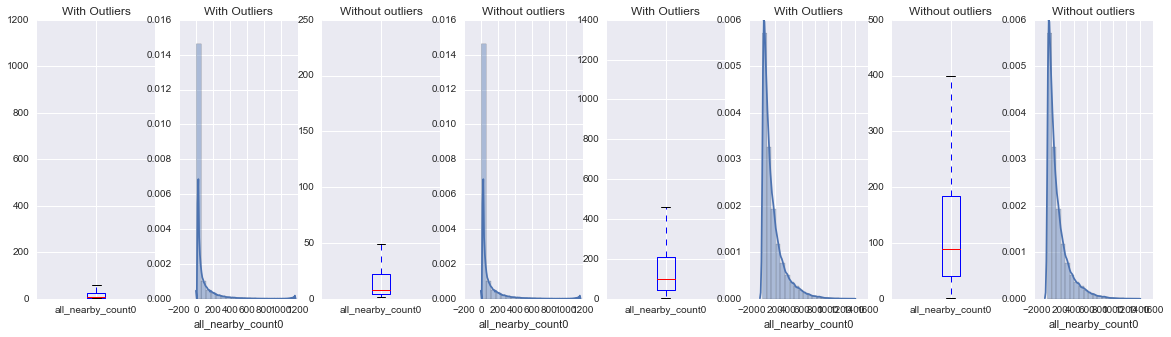

Variable: all_nearby_fires0 : Non-fires, then fires
--------------------------------------------------


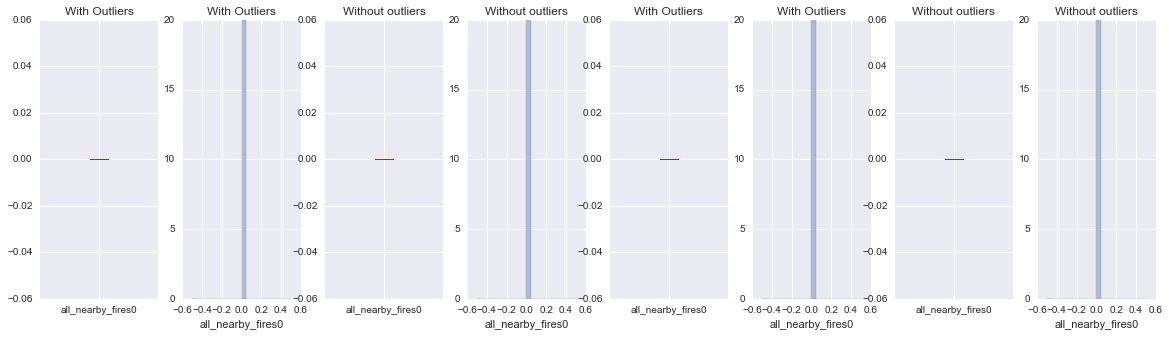

Variable: all_nearby_count1 : Non-fires, then fires
--------------------------------------------------


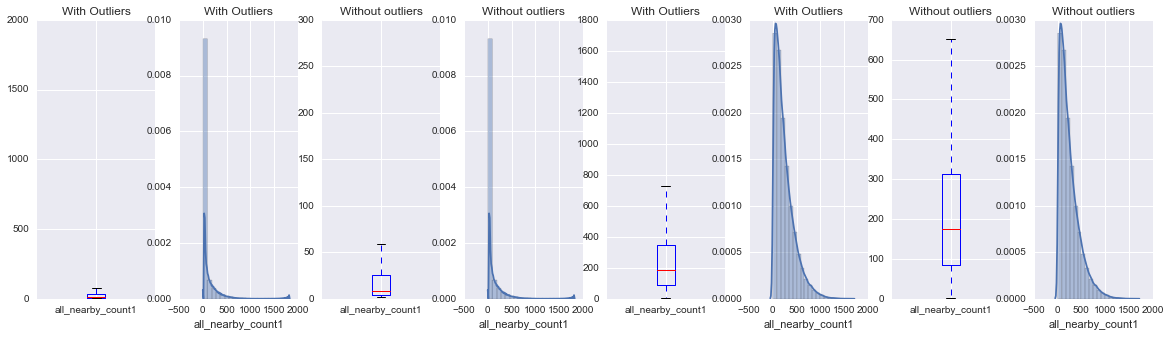

Variable: all_nearby_fires1 : Non-fires, then fires
--------------------------------------------------


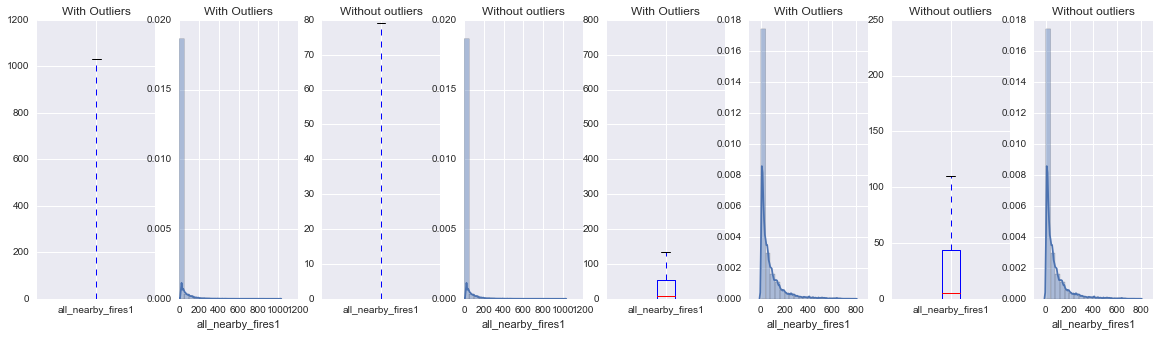

Variable: all_nearby_count2 : Non-fires, then fires
--------------------------------------------------


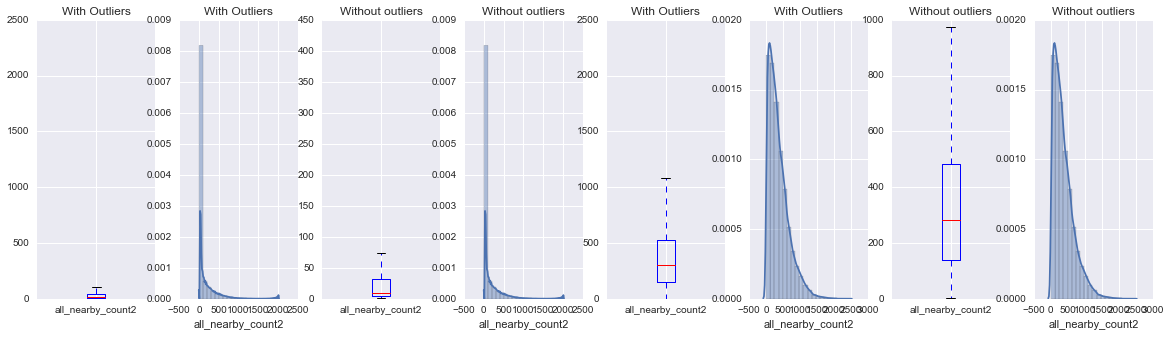

Variable: all_nearby_fires2 : Non-fires, then fires
--------------------------------------------------


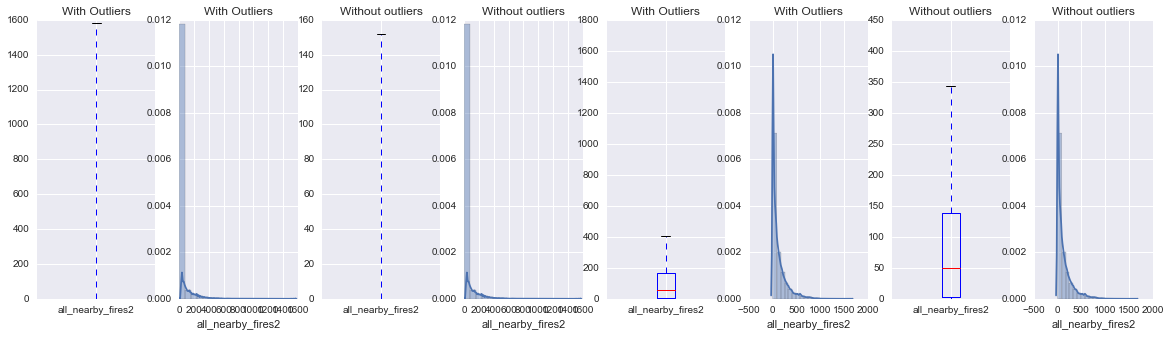

Variable: all_nearby_count3 : Non-fires, then fires
--------------------------------------------------


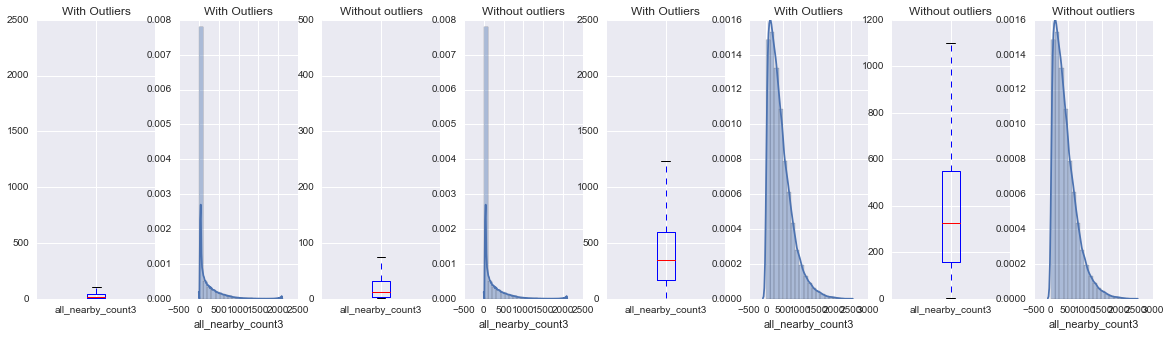

Variable: all_nearby_fires3 : Non-fires, then fires
--------------------------------------------------


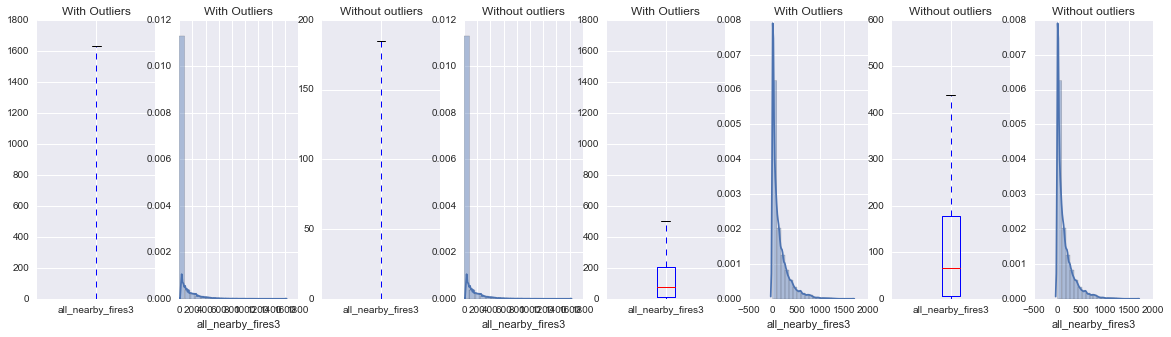

Variable: all_nearby_count4 : Non-fires, then fires
--------------------------------------------------


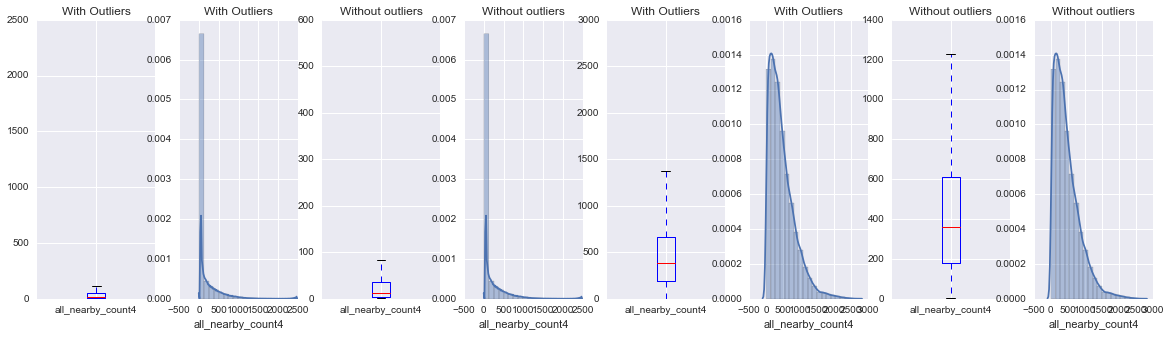

Variable: all_nearby_fires4 : Non-fires, then fires
--------------------------------------------------


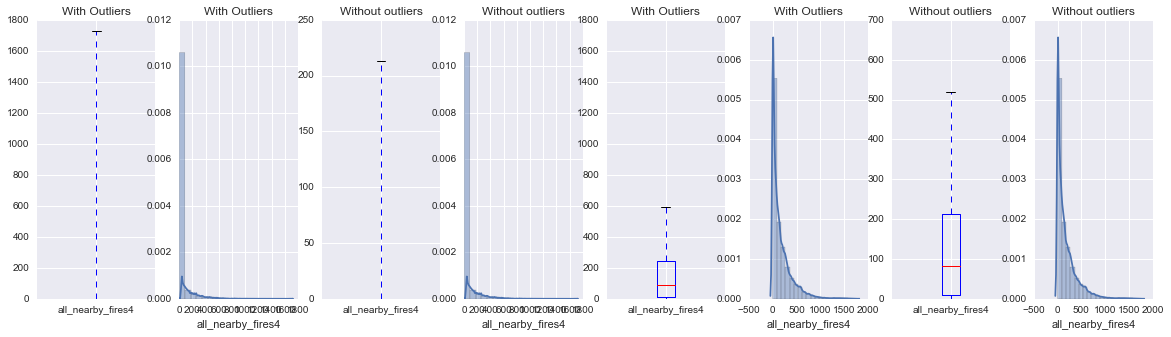

Variable: all_nearby_count5 : Non-fires, then fires
--------------------------------------------------


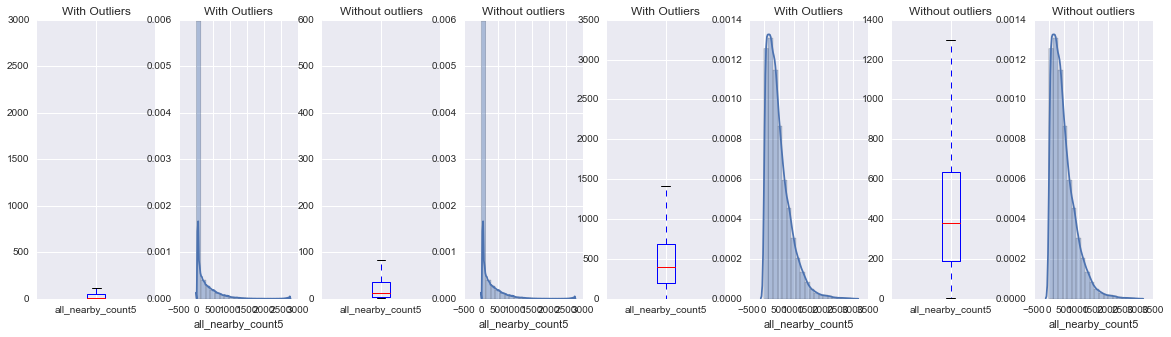

Variable: all_nearby_fires5 : Non-fires, then fires
--------------------------------------------------


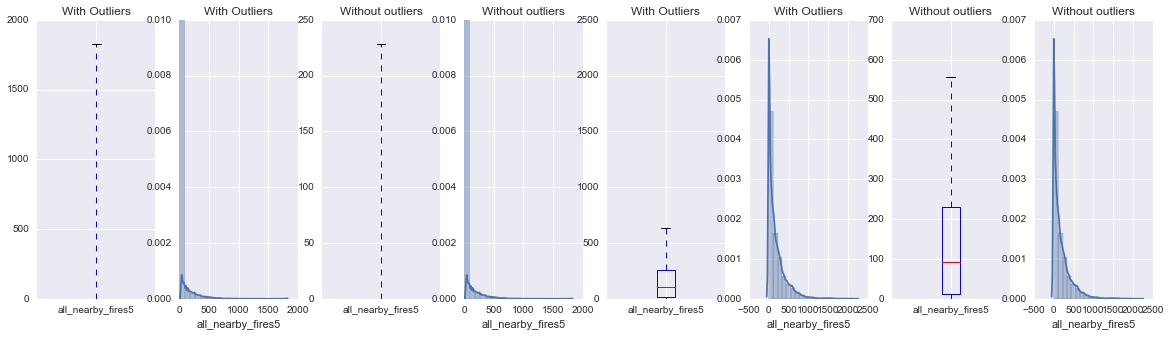

Variable: all_nearby_count6 : Non-fires, then fires
--------------------------------------------------


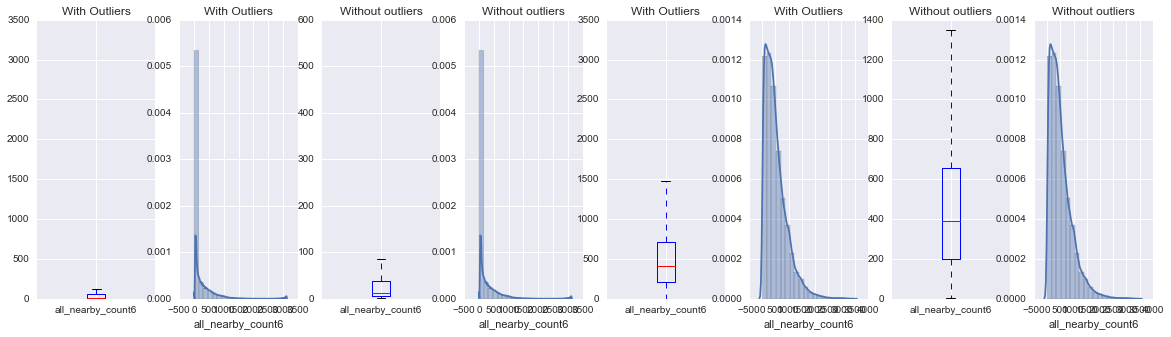

Variable: all_nearby_fires6 : Non-fires, then fires
--------------------------------------------------


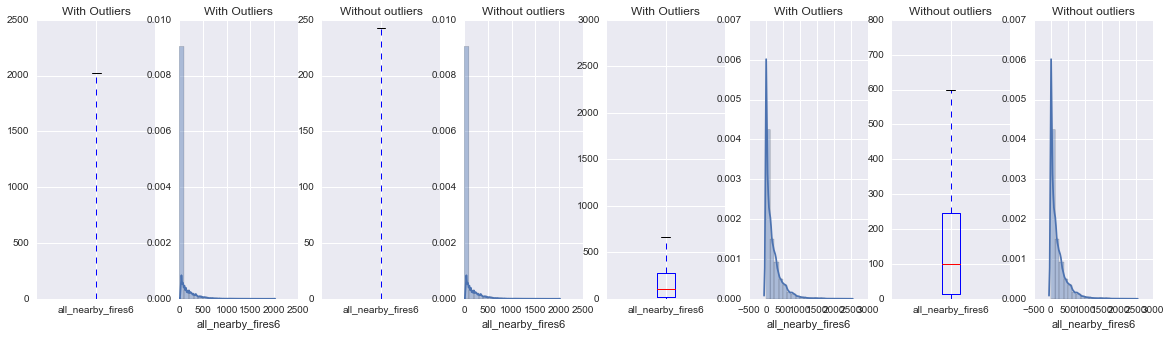

Variable: all_nearby_count7 : Non-fires, then fires
--------------------------------------------------


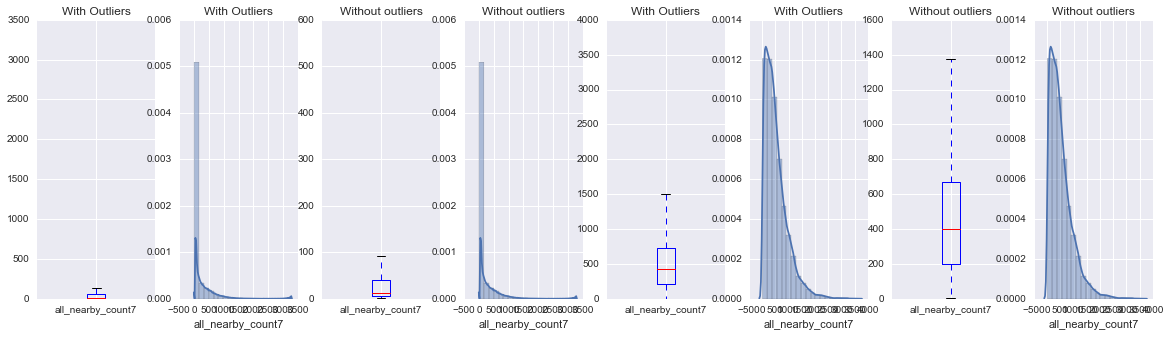

Variable: all_nearby_fires7 : Non-fires, then fires
--------------------------------------------------


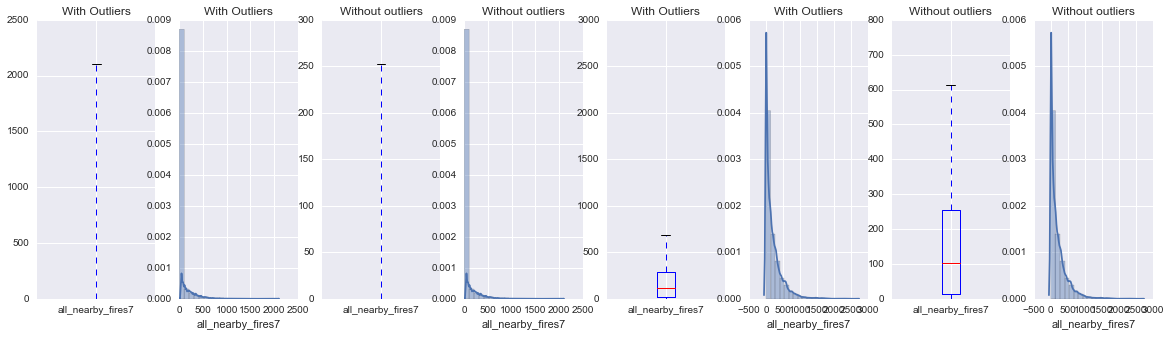

Variable: all_nearby_count365 : Non-fires, then fires
--------------------------------------------------


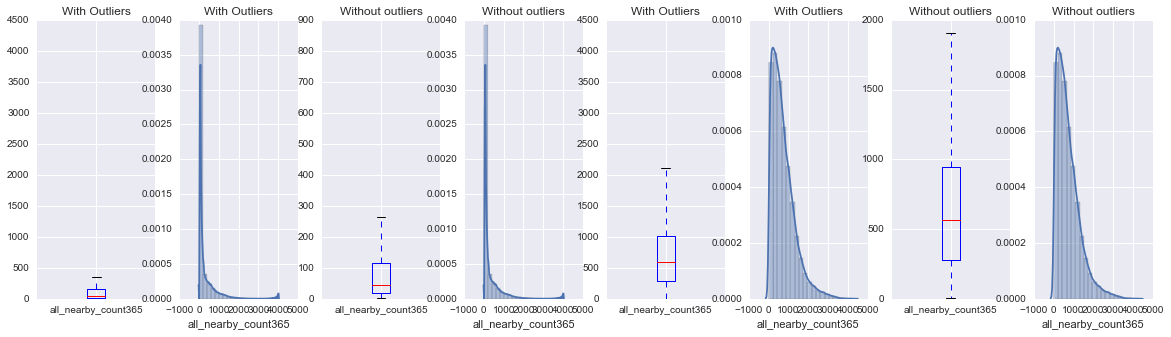

Variable: all_nearby_fires365 : Non-fires, then fires
--------------------------------------------------


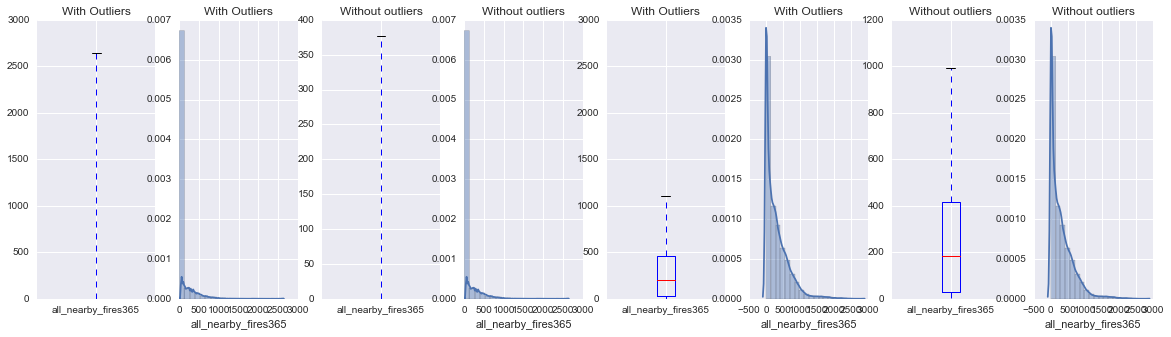

Variable: all_nearby_count730 : Non-fires, then fires
--------------------------------------------------


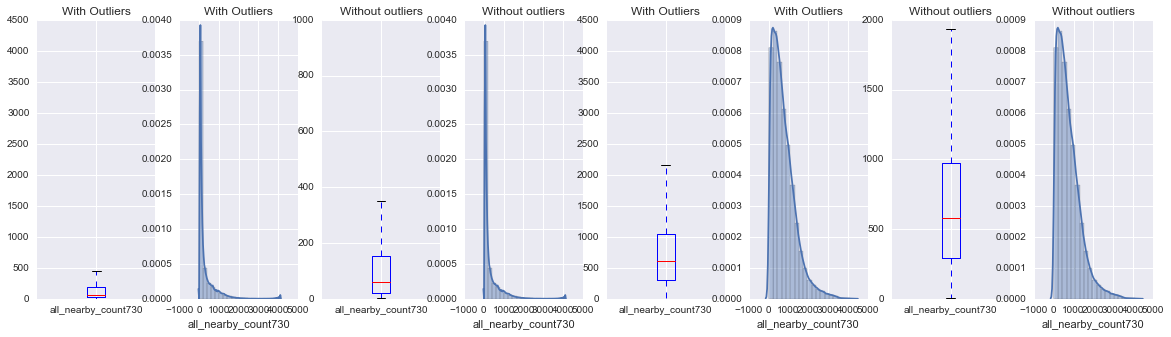

Variable: all_nearby_fires730 : Non-fires, then fires
--------------------------------------------------


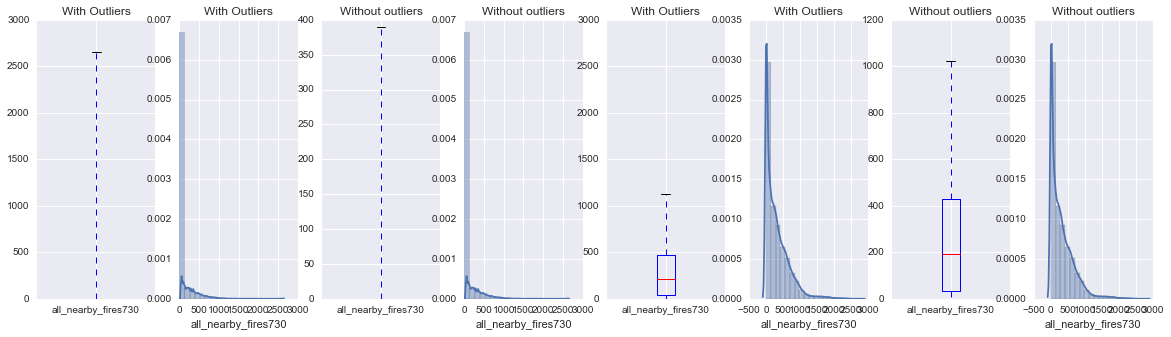

Variable: all_nearby_count1095 : Non-fires, then fires
--------------------------------------------------


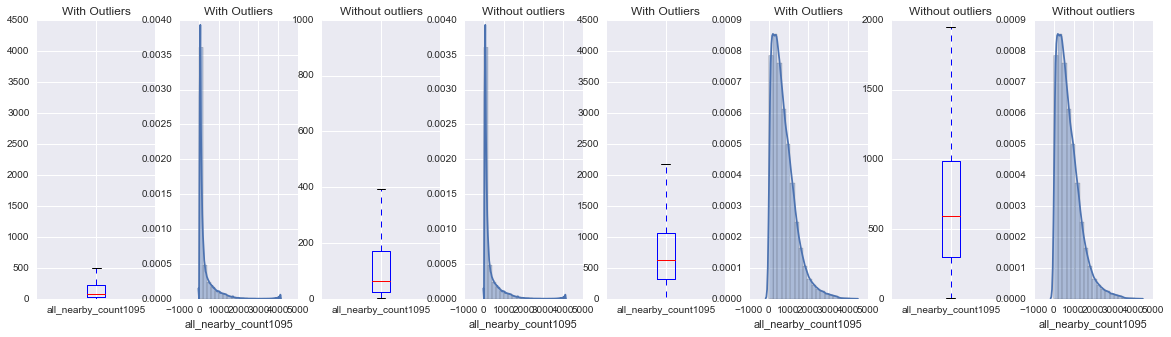

Variable: all_nearby_fires1095 : Non-fires, then fires
--------------------------------------------------


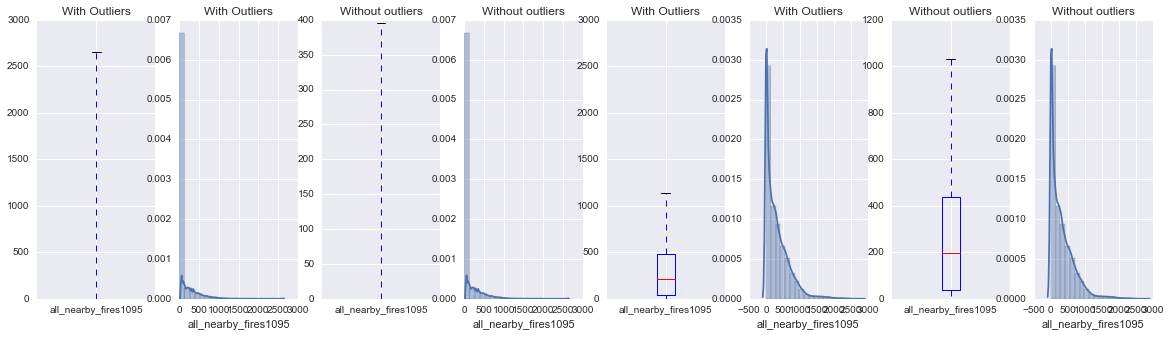

In [5]:
for col in keep_cols: 
    print 'Variable: {} : Non-fires, then fires'.format(col)
    print '-' * 50
    f, axes = plt.subplots(1, 8, figsize=(20, 5))
    plot_var_dist(non_fires[col], categorical=False, ax=axes[0:4], show=False)
    plot_var_dist(fires[col], categorical=False, ax=axes[4:], show=False)
    plt.show()

In [6]:
for col in keep_cols: 
    print 'Variable: {} : Non-fires, then fires'.format(col)
    print '-' * 50
    print 
    print non_fires[col].describe()
    print 
    print fires[col].describe()
    print '\n' * 3

Variable: all_nearby_count0 : Non-fires, then fires
--------------------------------------------------

count    652962.000000
mean         38.451058
std          85.415300
min           2.000000
25%           4.000000
50%           8.000000
75%          26.000000
max        1170.000000
Name: all_nearby_count0, dtype: float64

count    143533.000000
mean        155.928741
std         166.161129
min           2.000000
25%          42.000000
50%          98.000000
75%         210.000000
max        1376.000000
Name: all_nearby_count0, dtype: float64




Variable: all_nearby_fires0 : Non-fires, then fires
--------------------------------------------------

count    652962
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max           0
Name: all_nearby_fires0, dtype: float64

count    143533
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max           0
Name: all_nearby_fires0, dtype: float64




Given the above, it looks like the majority of these columns could be helpful in identifying fires. The observations that are fires clearly have different distributions than observations that are not labeled as fires, which was to be expected. The observations that are fires have a larger number of nearby observations, regardless of whether or not we restrict those nearby observations to be fires or not. 

The one column that won't be helpful (and it was designed this way, so I really shouldn't have created it), is the `all_nearby_fires0`. So, I'll have to throw that out when modeling, and the rest I'll have to test out to see if they add predictive power. Obviously, they are all highly correlated, and as a result it might be the case that a handful of them can capture the most of the predictive power that they collectively offer. 